## TASK 1
### Pregunta 1
¿Por qué el modelo de Naive Bayes se le considera “naive”?

R// este modelo se considera así, porque asume que todas las caracteristicas son independientes entre sí, dado la clase del dato. Una desventaja de esto es que en la mayoría de problemas del mundo real, esta suposición no es completamente cierta, ya que las caracteristicas si suelen estar correlacionadas. Sin embargo, el modelo funciona completamente bien en contextos como clasificación de texto y detección de spam.

### Pregunta 2
Explique la formulación matemática que se busca optimizar en Support Vector Machine, además responda ¿cómo funciona el truco del Kernel para este modelo? (Lo que se espera de esta pregunta es que puedan explicar en sus propias palabras la fórmula a la que llegamos que debemos optimizar de SVM en clase) 

R// El objetivo de una svm es encontrar un hiperplano que maximice el margen entre clases en un espacio de caracteristicas, utilizando el truco del kernel. El truco del kernel permite a svm trabajar en espacios de alta dimension sin necesidad de calcular explicitamente la transformación de los datos, es decír, permite a svm manejar datos que no son linealmente separables en el espacio original de caracteristicas. La idea ee mapear los datos a un espacio de mayor dimensión donde si sean linealmente separables.

### Pregunta 3
Investigue sobre Random Forest y responda

a. ¿Qué tipo de ensemble learning es este modelo?

R// Random forest es un método de ensemble basado en bagging. Bagging consiste en entrenar multiples modelos, arboles de decisión, en subconjuntos aleatorios del dataset y luego comnbinar sus predicciones para mejorar la estabilidad y precisión del modelo. 

b. ¿Cuál es la idea general detrás de Random Forest?

R// La idea principal de Random Forest es entrenar múltiples árboles de decisión sobre diferentes subconjuntos aleatorios del dataset y luego promediar sus resultados (para regresión) o realizar una votación mayoritaria (para clasificación). Esto reduce el sobreajuste y mejora la capacidad de generalización del modelo.

c. ¿Por qué se busca baja correlación entre los árboles de Random Forest?

R// Si los árboles de decisión en el Random Forest estuvieran altamente correlacionados, todos cometerían los mismos errores y el modelo perdería su capacidad de generalización.

In [6]:
#task2 para detectar si un mensaje es o no es spam
import re
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class NaiveBayesSpamFilter:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Suavizado de Laplace
        self.word_counts = {"ham": defaultdict(int), "spam": defaultdict(int)}
        self.class_counts = {"ham": 0, "spam": 0}
        self.vocab = set()
    
    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Elimina caracteres especiales
        return text.split()
    
    def fit(self, X_train, y_train):
        for message, label in zip(X_train, y_train):
            words = self.clean_text(message)
            self.class_counts[label] += 1
            for word in words:
                self.word_counts[label][word] += 1
                self.vocab.add(word)
    
    def predict(self, X_test, return_probs=False):
        predictions = []
        total_messages = sum(self.class_counts.values())
        priors = {label: np.log(self.class_counts[label] / total_messages) for label in ["ham", "spam"]}
        
        for message in X_test:
            words = self.clean_text(message)
            scores = priors.copy()
            
            for label in ["ham", "spam"]:
                for word in words:
                    word_freq = self.word_counts[label].get(word, 0)
                    prob_word_given_label = (word_freq + self.alpha) / (sum(self.word_counts[label].values()) + self.alpha * len(self.vocab))
                    scores[label] += np.log(prob_word_given_label)
            
            # Normalización usando Softmax
            exp_scores = {label: np.exp(scores[label]) for label in scores}
            total_score = sum(exp_scores.values())
            probs = {label: exp_scores[label] / total_score for label in scores}
            
            if return_probs:
                predictions.append((probs["ham"], probs["spam"]))
            else:
                predictions.append(max(probs, key=probs.get))
        
        return predictions


# Cargar y limpiar dataset con verificación de formato
def load_and_clean_data(filename):
    messages = []
    labels = []
    with open(filename, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 2:  # Verifica que haya al menos una etiqueta y un mensaje
                label = parts[0].strip().lower()  # Asegurar que la etiqueta sea 'ham' o 'spam'
                message = " ".join(parts[1:]).strip()  # Unir el resto como mensaje
                if label in ["ham", "spam"]:  # Validación de etiqueta correcta
                    messages.append(message)
                    labels.append(label)
    return messages, labels

# Recargar datos con la función corregida
messages, labels = load_and_clean_data("entrenamiento.txt")


# Dividir en training y test
messages, labels = load_and_clean_data("entrenamiento.txt")
X_train, X_test, y_train, y_test = train_test_split(messages, labels, test_size=0.2, random_state=42)

# Entrenar modelo
nb_model = NaiveBayesSpamFilter()
nb_model.fit(X_train, y_train)

# Evaluación
predictions = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Precisión del modelo: {accuracy:.4f}")
print("Reporte de clasificación:")
print(classification_report(y_test, predictions))

def classify_new_message():
    while True:
        message = input("Ingrese un mensaje (o escriba 'exit' para salir): ")
        if message.lower() == "exit":
            break
        probs = nb_model.predict([message], return_probs=True)[0]
        print(f"Probabilidad Ham: {probs[0]:.4f}, Probabilidad Spam: {probs[1]:.4f}")
        print("Clasificación:", "Ham" if probs[0] > probs[1] else "Spam")


# Descomente para probar clasificación en tiempo real
classify_new_message()


Precisión del modelo: 0.9784
Reporte de clasificación:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       950
        spam       0.90      0.96      0.93       163

    accuracy                           0.98      1113
   macro avg       0.95      0.97      0.96      1113
weighted avg       0.98      0.98      0.98      1113

Probabilidad Ham: 0.3591, Probabilidad Spam: 0.6409
Clasificación: Spam
Probabilidad Ham: 0.0958, Probabilidad Spam: 0.9042
Clasificación: Spam
Probabilidad Ham: 0.7042, Probabilidad Spam: 0.2958
Clasificación: Ham
Probabilidad Ham: 0.2351, Probabilidad Spam: 0.7649
Clasificación: Spam
Probabilidad Ham: 0.4692, Probabilidad Spam: 0.5308
Clasificación: Spam
Probabilidad Ham: 0.8688, Probabilidad Spam: 0.1312
Clasificación: Ham


In [7]:
#ahora se hace el modelo de bayes pero con librerias
import re
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

class NaiveBayesSpamFilter:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Suavizado de Laplace
        self.word_counts = {"ham": defaultdict(int), "spam": defaultdict(int)}
        self.class_counts = {"ham": 0, "spam": 0}
        self.vocab = set()
    
    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Elimina caracteres especiales
        return text.split()
    
    def fit(self, X_train, y_train):
        for message, label in zip(X_train, y_train):
            words = self.clean_text(message)
            self.class_counts[label] += 1
            for word in words:
                self.word_counts[label][word] += 1
                self.vocab.add(word)
    
    def predict(self, X_test, return_probs=False):
        predictions = []
        total_messages = sum(self.class_counts.values())
        priors = {label: np.log(self.class_counts[label] / total_messages) for label in ["ham", "spam"]}
        
        for message in X_test:
            words = self.clean_text(message)
            scores = priors.copy()
            
            for label in ["ham", "spam"]:
                for word in words:
                    word_freq = self.word_counts[label].get(word, 0)
                    prob_word_given_label = (word_freq + self.alpha) / (sum(self.word_counts[label].values()) + self.alpha * len(self.vocab))
                    scores[label] += np.log(prob_word_given_label)
        
            exp_scores = {label: np.exp(scores[label]) for label in scores}
            total_score = sum(exp_scores.values())
            probs = {label: exp_scores[label] / total_score for label in scores}
        
            if return_probs:
                predictions.append((probs["ham"], probs["spam"]))
            else:
                predictions.append(max(probs, key=probs.get))
        return predictions

# Cargar y limpiar dataset
def load_and_clean_data(filename):
    messages = []
    labels = []
    with open(filename, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 2:
                label = parts[0].strip().lower()
                message = " ".join(parts[1:]).strip()
                if label in ["ham", "spam"]:
                    messages.append(message)
                    labels.append(label)
    return messages, labels

# Dividir en training y test
messages, labels = load_and_clean_data("entrenamiento.txt")
X_train, X_test, y_train, y_test = train_test_split(messages, labels, test_size=0.2, random_state=42)

# Entrenar modelo manual
nb_model = NaiveBayesSpamFilter()
nb_model.fit(X_train, y_train)

# Evaluación del modelo manual
predictions = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Precisión del modelo manual: {accuracy:.4f}")
print("Reporte de clasificación (manual):")
print(classification_report(y_test, predictions))

# Entrenar modelo con sklearn
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

sklearn_nb = MultinomialNB()
sklearn_nb.fit(X_train_vec, y_train)
sklearn_predictions = sklearn_nb.predict(X_test_vec)

# Evaluación del modelo con sklearn
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f"Precisión del modelo sklearn: {sklearn_accuracy:.4f}")
print("Reporte de clasificación (sklearn):")
print(classification_report(y_test, sklearn_predictions))



Precisión del modelo manual: 0.9784
Reporte de clasificación (manual):
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       950
        spam       0.90      0.96      0.93       163

    accuracy                           0.98      1113
   macro avg       0.95      0.97      0.96      1113
weighted avg       0.98      0.98      0.98      1113

Precisión del modelo sklearn: 0.9901
Reporte de clasificación (sklearn):
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       950
        spam       0.97      0.96      0.97       163

    accuracy                           0.99      1113
   macro avg       0.98      0.98      0.98      1113
weighted avg       0.99      0.99      0.99      1113



## comparación de los dos modelos...
La precisión del modelo manual es de 0.9784 y la precisión del modelo de sklearn fue de 0.9905. Esto se pudo deber a varios factores, algunos de ellos son: la estructura de datos que utiliza MultinomialNB usa estructuras de datos optmizadas y operaciones vectorizadas, lo que reduce errores de redondeo y mejor estabilidad numérica, ademas de un manejo interno del suavizado de laplace de manera más eficiente. Ademas sklearn transforma los datos en una matriz dispersa altamente eficiente, mientras el modelo manual opera directamente sobre listas y diccionarios. 

C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_29716\3286565386.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["blueWins"], palette=["red", "blue"])


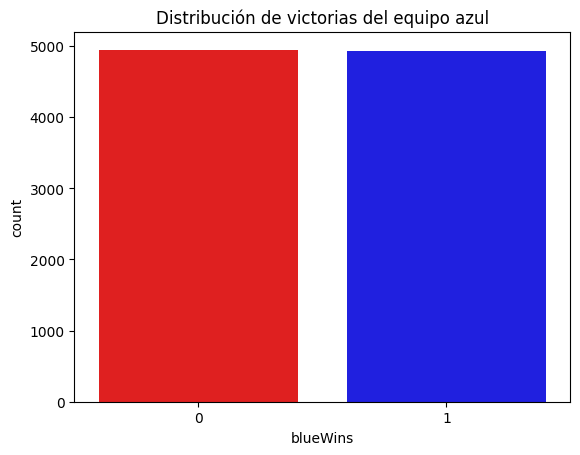

Precisión del SVM manual: 0.3502


In [8]:
#task 3, pero sin librerias... 
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar dataset
df = pd.read_csv("high_diamond_ranked_10min.csv")

# Eliminar columnas irrelevantes o redundantes
df.drop(columns=["gameId", "redGoldDiff", "redExperienceDiff"], inplace=True)

# Verificar balanceo de clases
sns.countplot(x=df["blueWins"], palette=["red", "blue"])
plt.title("Distribución de victorias del equipo azul")
plt.show()

# Separar características y variable objetivo
X = df.drop(columns=["blueWins"])
y = df["blueWins"]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento (80%), validación (10%) y test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Implementación manual de SVM con SGD
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y == 1, 1, -1)  # Convertir etiquetas a -1 y 1
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Entrenar el modelo
svm_manual = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_manual.fit(X_train, y_train)

# Evaluación del modelo
from sklearn.metrics import accuracy_score
predictions = svm_manual.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Precisión del SVM manual: {accuracy:.4f}")


C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_29716\2487277195.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["blueWins"], palette=["red", "blue"])


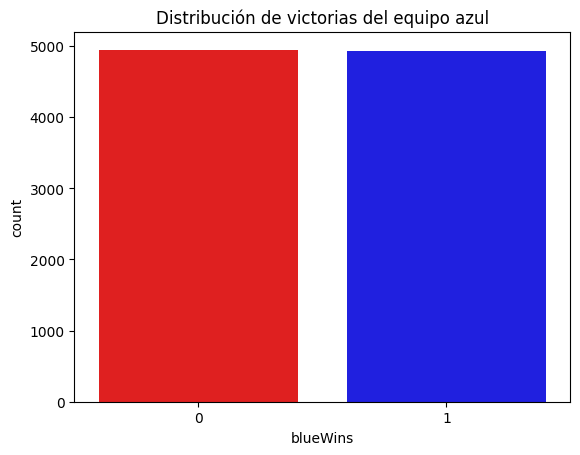

Precisión del SVM con sklearn: 0.7318


In [9]:
#Task 3 pero con librerias
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar dataset
df = pd.read_csv("high_diamond_ranked_10min.csv")

# Eliminar columnas irrelevantes o redundantes
df.drop(columns=["gameId", "redGoldDiff", "redExperienceDiff"], inplace=True)

# Verificar balanceo de clases
sns.countplot(x=df["blueWins"], palette=["red", "blue"])
plt.title("Distribución de victorias del equipo azul")
plt.show()

# Separar características y variable objetivo
X = df.drop(columns=["blueWins"])
y = df["blueWins"]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento (80%), validación (10%) y test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entrenar modelo con SVM de sklearn
svm_sklearn = SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train, y_train)

# Evaluar modelo
predictions = svm_sklearn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Precisión del SVM con sklearn: {accuracy:.4f}")

## Comparación etre ambos svm...
El modelo realizado con libreria es claramente superior en precisión y velocidad. La implementación manual sirve para entender el algoritmo, pero en la practica, pero en la practica, es mejor usar librerías optmizadas. Debido a la baja precisón del svm manual, lo que indica que no logró separar bien las clases, esto puede deberse a problemas de convergencia en el algoritmo o a que el hiperplano de decisión no se optimizó bien. En cambio el svm con sklearn alcanzó una precisión de 0.7318, indicando que logró una mejor entre clases. Además usa métodos optimizados para resolver el problema de maximización del margen, garantizando una mejor generalización. 
El modelo de Sklearn fue mucho más rápido porque está optimizado con mejores algoritmos de optimización. Y el modelo que usaria es el sklearn